# Caso de negocio: Attrition o Desersión de clientes

Se desea saber la probalidad de que los clientes de una entidad financiera dejen de usar sus productos o servicios (attrition). Para esto se tiene un dataset con información relacionada al comportamiento de los clientes teniendo en cuenta un mes de referencia y un indicador de attrition.
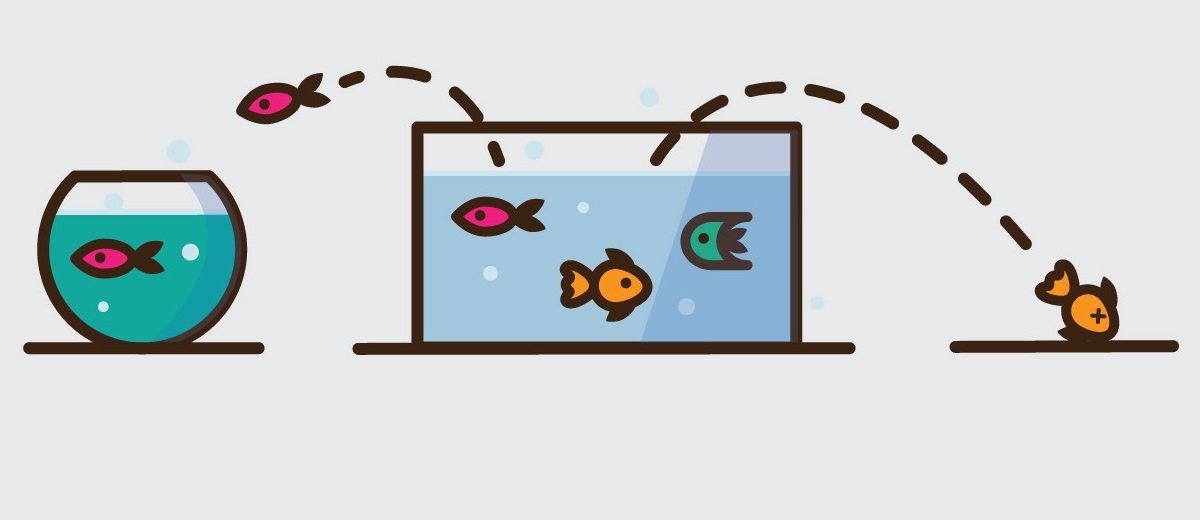

## Diccionario de datos
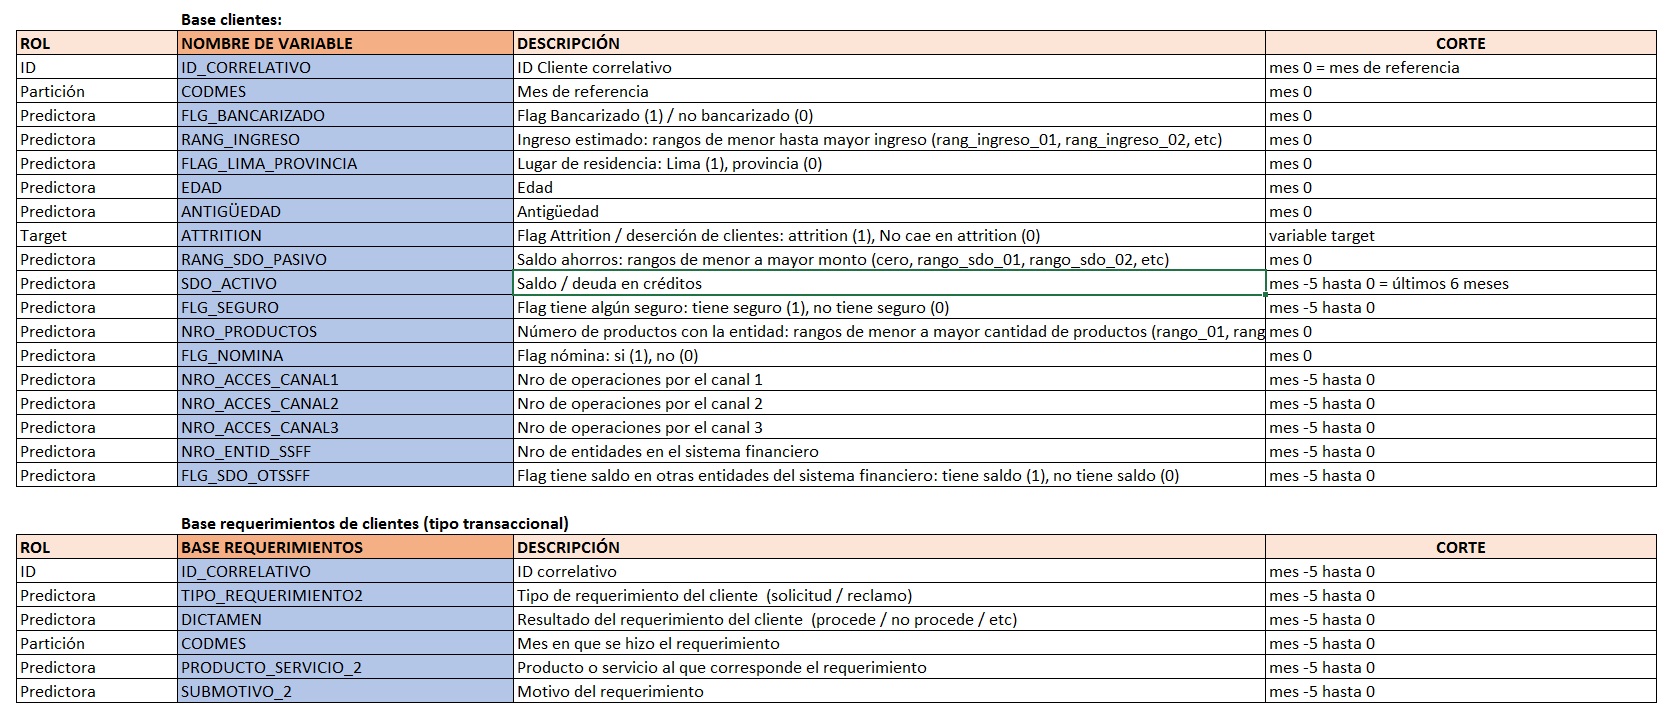

## 1. Análisis Exploratorio de Datos
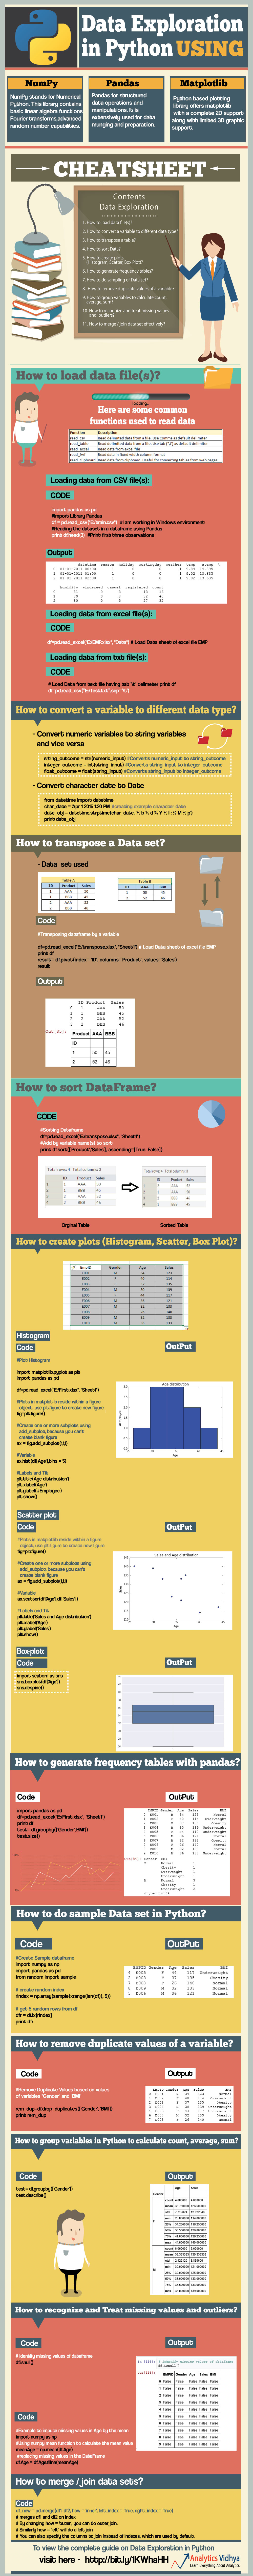

### 1.1. Carga de datos

In [ ]:
import pandas as pd
#!pip install xlrd

In [ ]:
df_train_clientes = pd.read_excel('../data/train_clientes.xlsx')

In [ ]:
#df_train_clientes.info()

### 1.2. Ratio de efectividad por variable

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#sns.boxplot(x=df_train_clientes["ATTRITION"], y=df_train_clientes["EDAD"] )

In [ ]:
df_train_clientes.groupby('ATTRITION').size()

In [ ]:
p1 = sns.kdeplot((df_train_clientes.loc[df_train_clientes['ATTRITION'] == 0,'EDAD']).dropna(), shade=True, legend=True, label = '0')
p2 = sns.kdeplot((df_train_clientes.loc[df_train_clientes['ATTRITION'] == 1,'EDAD']).dropna(), shade=True, legend=True, label = '1', color="r")

p2.set_title("¿Podemos sacar alguna conclusión?")

### ... veamos cómo podemos mejorar

In [ ]:
# Agregemos las variables que deseamos plotear
col = 'ANTIGUEDAD'

tb_efec = df_train_clientes.groupby(pd.qcut(x=df_train_clientes[col], q=10, duplicates='drop')).agg({'ATTRITION': 'mean', 'ID_CORRELATIVO':'count'})
tb_efec.columns = ['ATTRITION','Q']
tb_efec['%Q'] = tb_efec['Q']/sum(tb_efec['Q'])
tb_efec.reset_index(inplace = True)
tb_efec[col] = tb_efec[col].astype(str)

plt.rcParams['figure.figsize'] = [10, 20]

plt.subplot(2, 1, 1)
plt.plot(col, 'ATTRITION', data=tb_efec, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.ylabel('ATRITION', fontweight='bold', color = 'green', fontsize='12')
plt.xlabel(col, fontweight='bold', color = 'green', fontsize='12')
plt.ylim(0,) # Ojo con los límites del eje y

plt.xticks(rotation=20)

plt.subplot(2, 1, 2)
plt.bar(col, '%Q', data=tb_efec)
plt.ylabel('%Q', fontweight='bold', color = 'green', fontsize='12')
plt.xlabel(col, fontweight='bold', color = 'green', fontsize='12')
plt.xticks(rotation=20)

In [ ]:
col_num = ['EDAD','ANTIGUEDAD']
i = 0

for col in col_num:
    tb_efec = df_train_clientes.groupby(pd.qcut(x=df_train_clientes[col], q=10, duplicates='drop')).agg({'ATTRITION': 'mean', 'ID_CORRELATIVO':'count'})
    tb_efec.columns = ['ATTRITION','Q']
    tb_efec.reset_index(inplace = True)
    tb_efec[col] = tb_efec[col].astype(str)

    plt.rcParams['figure.figsize'] = [10, 10*len(col_num)]
    
    i = i + 1
    plt.subplot(len(col_num), 1, i)
    plt.plot(col, 'ATTRITION', data=tb_efec, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    plt.ylabel('ATRITION', fontweight='bold', color = 'green', fontsize='12')
    plt.xlabel(col, fontweight='bold', color = 'green', fontsize='12')
    plt.xticks(rotation=20)
    plt.ylim(0,)

### 2.2. Ratio de efectividad por variable categórica

In [ ]:
df_train_clientes.select_dtypes(include='object')

In [ ]:
col_cat = ['RANG_INGRESO','FLAG_LIMA_PROVINCIA','RANG_SDO_PASIVO_MENOS0','RANG_NRO_PRODUCTOS_MENOS0']
i = 0

for col in col_cat:
    tb_efec = df_train_clientes.groupby(col).agg({'ATTRITION': 'mean', 'ID_CORRELATIVO':'count'})
    tb_efec.columns = ['ATTRITION','Q']
    tb_efec.reset_index(inplace = True)
    tb_efec[col] = tb_efec[col].astype(str)

    plt.rcParams['figure.figsize'] = [10, 10*len(col_cat)]
    
    i = i + 1
    plt.subplot(len(col_cat), 1, i)
    plt.plot(col, 'ATTRITION', data=tb_efec, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    plt.ylabel('ATRITION', fontweight='bold', color = 'green', fontsize='12')
    plt.xlabel(col, fontweight='bold', color = 'green', fontsize='12')
    plt.xticks(rotation=20)
    plt.ylim(0,)

# 3. Tratamiento de valores Nulos

Existen numerosas tecnicas de inpitación para lidiar con los datos faltantes, entre ellas tenemos:

1. Eliminar los registros
2. Inputación por la media, mediana o moda (dependiendo del tipo de dato)
3. Crear un modelo para predecir los datos faltantes
4. Dejar que los algoritmos se encarguen de ellos

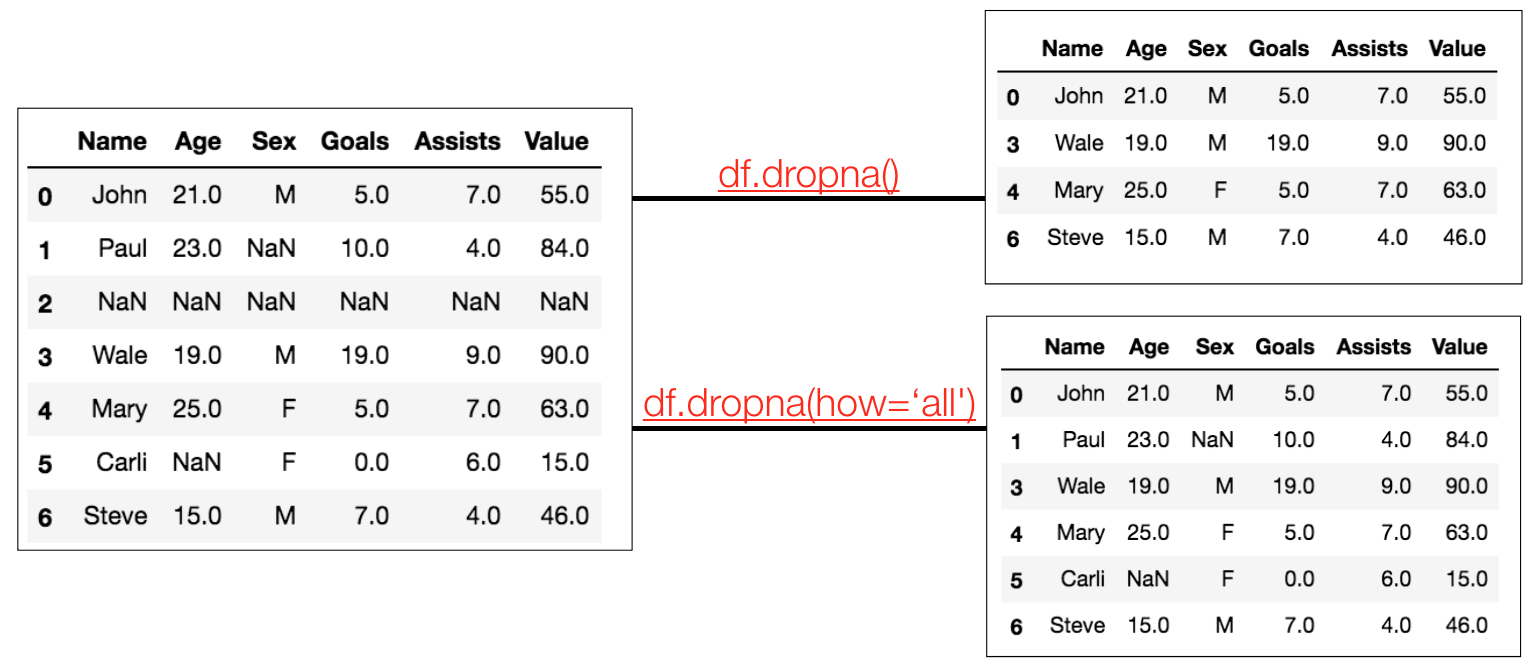

In [ ]:
# Para no afectar nuestro data inicial crearemos un nuevo objeto
df_train_clientes_aux = df_train_clientes

In [ ]:
# Mostremos el % de missing por variable
df_train_clientes_aux.isnull().sum() / len(df_train_clientes_aux)

### 3.1 Eliminar los registros con datos perdidos

In [ ]:
df_train_clientes_aux.groupby('ATTRITION').size()

In [ ]:
(10822) / (59178+10822)

In [ ]:
# Eliminar todos los registros que tengan al menos un valor missing
df_train_clientes_aux.dropna().shape

In [ ]:
# Eliminemos filas donde la EDAD es missing
df_train_clientes_aux[df_train_clientes_aux.EDAD.notnull()].shape

### 3.2 Inputación por la media, mediana o moda

Referencia: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html

In [ ]:
# Promedio de la EDAD
df_train_clientes_aux.EDAD.mean()

In [ ]:
# Mediana de la EDAD
df_train_clientes_aux.EDAD.median()

In [ ]:
# Edad con mayor frecuencia (moda)
df_train_clientes_aux.EDAD.mode()

In [ ]:
# Completar los valores perdidos de la EDAD por promedio, mediana y moda
df_train_clientes_aux.EDAD.fillna(df_train_clientes_aux.EDAD.mean())

In [ ]:
# Veamos como es la distribución de la variable EDAD con la imputación
plt.figure(figsize=(15,8)) #definir el tamaño de la imagen
sns.kdeplot(df_train_clientes_aux.EDAD.dropna(), shade=True, legend=True, label = 'sin imputar')
sns.kdeplot(df_train_clientes_aux.EDAD.fillna(df_train_clientes_aux.EDAD.median()), shade=True, legend=True, label = 'imputados')

## 4. Valores atípicos
http://analisisydecision.es/wp-content/uploads/2016/04/outlier.gif

## ¿Cómo identificarlos?
Refencias: 
- https://matplotlib.org/api/pyplot_api.html
- https://en.wikipedia.org/wiki/Box_plot

In [ ]:
# Revisemos si tenemos outliers en la variable EDAD
edad = df_train_clientes.EDAD.dropna()

plt.figure(figsize=(15,8)) #definir el tamaño de la imagen
sns.boxplot(edad, orient = 'h', whis = 1.5)

In [ ]:
# Identificar los cuartiles mediana (Q1, Q2 y Q3)
edad.quantile([.25, .5, .75])

In [ ]:
# Rango intercuartil (Q3 - Q1)
rangoIQ = edad.quantile(.75) - edad.quantile(.25)
rangoIQ

In [ ]:
# limites de las cajas
lsup = edad.quantile(.75) + rangoIQ*1.5
linf = edad.quantile(.25) - rangoIQ*1.5
print('Límite inferior y superior:\t',linf,lsup)

In [ ]:
# Quitamos los valor atípicos
edad_sinAtip = [e for e in edad if e > lsup]

# Ploteamos
plt.figure(figsize=(15,8)) #definir el tamaño de la imagen
sns.boxplot(edad_sinAtip)

## 5 Feature ingeeniering, transformation and selection

En la práctica, se demuestra que un modelo simple entrenado con **datos de alta calidad** es mejor que un conjunto complicado de múltiples modelos basados en datos sin ningún tratamiento.

- Feature extraction o feature engineering: es el proceso de usar el conocimiento de los datos para crear feature (variables) que logren el funcionamiento de los algoritmos de machine learning.
- Feature transformation: transformar los datos para mejorar la precisión del algoritmo.
- Feature selection: eliminar las variables que no generen valor.

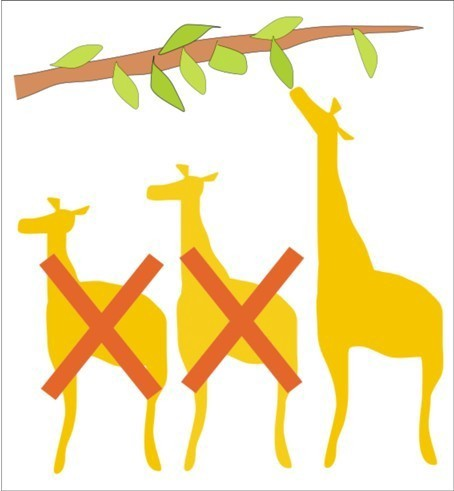

### 5.1 Feature ingeeniering

In [ ]:
df_train_req = pd.read_excel('../data/train_requerimientos.xlsx')

In [ ]:
# Número de requerimientos por mes
df_train_req.groupby('CODMES').size()

In [ ]:
df_train_req.head()

In [ ]:
#!pip install pandas_ply
from pandas_ply import install_ply, X, sym_call
install_ply(pd)

In [ ]:
# Creamos variables
df_train_req_ag = (df_train_req
                   .groupby(['ID_CORRELATIVO'])
                   .ply_select(REQ_INI_MES = X.CODMES.min(),
                               REQ_ULT_MES = X.CODMES.max(),
                               REQ_NUM_PROD = X.PRODUCTO_SERVICIO_2.nunique(),
                               REQ_NUM_SUBMOT = X.SUBMOTIVO_2.nunique(),
                               #REQ_NUM_REC = X.CODMES.count() if X.TIPO_REQUERIMIENTO2 == 'Reclamo' else 0,
                               REQ_NUM_TOT = X.CODMES.count()))

df_train_req_ag.reset_index(drop = False, inplace = True)

In [ ]:
df_train_req_ag.head()

In [ ]:
# Agregar variables transaccionales
df_train_clientes_aux = df_train_clientes_aux.merge(df_train_req_ag, how='left', on = 'ID_CORRELATIVO')

In [ ]:
df_train_clientes_aux.head()

In [ ]:
# Eliminamos objetos innecesarios para librear memoria
del data_train_req_ag

#### Crear variables dummy

In [ ]:
pd.get_dummies(df_train_clientes, columns=['RANG_INGRESO','FLAG_LIMA_PROVINCIA']).head()

### 5.2 Feature transformations

#### Label Encoding

In [ ]:
df_train_clientes_aux.dtypes

In [ ]:
columns_cat = df_train_clientes_aux.select_dtypes(include=['object']).columns
columns_cat

In [ ]:
# Seleccionamos las variables de tipo "objeto"
columns_cat = df_train_clientes_aux.select_dtypes(include=['object']).columns

for col in columns_cat:
    # Cambiamos el typo de datos a categórica
    df_train_clientes_aux[col] = df_train_clientes_aux[col].astype('category')
    col_new = col + '_ENC'
    df_train_clientes_aux[col_new] = df_train_clientes_aux[col].cat.codes

In [ ]:
df_train_clientes_aux[['FLAG_LIMA_PROVINCIA','FLAG_LIMA_PROVINCIA_ENC']]

In [ ]:
# Veamos que sucedió con las variables de tipo category
df_train_clientes_aux.select_dtypes(exclude=['category'])

In [ ]:
df_train_clientes_aux.dtypes

#### Label Encoding usando sklearn

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_train_clientes.groupby('RANG_INGRESO').size()

In [ ]:
df_train_clientes.astype(str).groupby('RANG_INGRESO').size()

In [ ]:
le = LabelEncoder()
df_train_clientes['RANG_INGRESO_ENC'] = le.fit_transform(df_train_clientes['RANG_INGRESO'].fillna('na'))

In [ ]:
df_train_clientes[['RANG_INGRESO','RANG_INGRESO_ENC']]

### 5.3 Feature selections
Es un proceso en el que se seleccionan aquellas variables del conjunto de datos que contribuyen más a la predicción.

Podemos mencionar tres ventajas de realizar la selección de variables:

- Reduce el sobreajuste : menos datos redundantes significan menos oportunidades de tomar decisiones.
- Mejora la precisión : menos datos engañosos significa que la precisión del modelo mejora.
- Reduce el tiempo de entrenamiento : menos datos significa que los algoritmos entrenan más rápido.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

In [ ]:
names = ['SDO_ACTIVO_MENOS0', 'SDO_ACTIVO_MENOS1', 'SDO_ACTIVO_MENOS2', 'SDO_ACTIVO_MENOS3', 'SDO_ACTIVO_MENOS4', 'SDO_ACTIVO_MENOS5', 'ATTRITION']
array = df_train_clientes_aux[names].values

In [ ]:
X = array[:,0:6]
Y = array[:,6]
# feature extraction
test = SelectKBest(score_func=chi2, k=4) # numero de variables importantes
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

### Referencias:

Análisis exploratorio:
- https://www.analyticsvidhya.com/blog/2016/09/18-free-exploratory-data-analysis-tools-for-people-who-dont-code-so-well/
- https://www.analyticsvidhya.com/blog/2015/06/infographic-cheat-sheet-data-exploration-python/

Feature selecctions:
- https://machinelearningmastery.com/feature-selection-machine-learning-python/

Feature transformations:
- http://pbpython.com/categorical-encoding.html

Knn:
- http://dataaspirant.com/2016/12/30/k-nearest-neighbor-implementation-scikit-learn/